In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

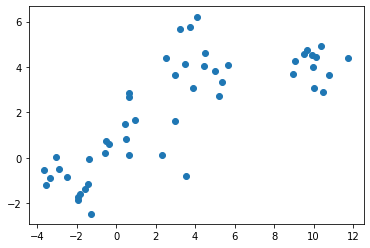

In [3]:
X1,Y1 = make_blobs(n_samples=50,centers=[[4,4],[-2,-1],[1,1],[10,4]],cluster_std=0.9)
plt.scatter(X1[:,0],X1[:,1],marker='o')

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
agglo = AgglomerativeClustering(n_clusters=4,linkage='average')
agglo.fit(X1,Y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

## Dendrogram Associated for the Agglomerative Hierarchical Clustering

In [6]:
distance = distance_matrix(X1,X1)
print(distance)

[[ 0.          1.3141559   1.54088247 ... 13.68261528 10.54856039
   0.89283139]
 [ 1.3141559   0.          0.72037325 ... 13.84295421 10.48083046
   1.01224942]
 [ 1.54088247  0.72037325  0.         ... 13.14388367  9.76285993
   0.79312267]
 ...
 [13.68261528 13.84295421 13.14388367 ...  0.          3.8659234
  13.05512278]
 [10.54856039 10.48083046  9.76285993 ...  3.8659234   0.
   9.8135712 ]
 [ 0.89283139  1.01224942  0.79312267 ... 13.05512278  9.8135712
   0.        ]]


In [7]:
from scipy.cluster import hierarchy

In [8]:
Z = hierarchy.linkage(distance,'complete')

c:\users\flash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


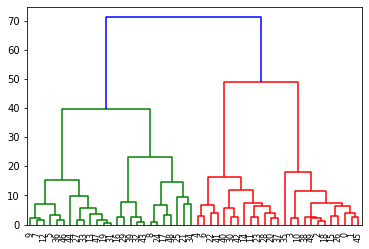

In [9]:
dendo = hierarchy.dendrogram(Z)

In [10]:
Z = hierarchy.linkage(distance,'average')

c:\users\flash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


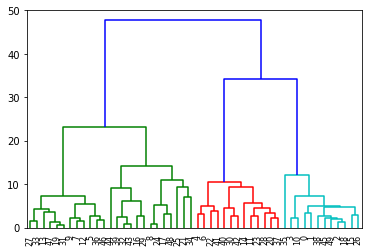

In [11]:
dendo = hierarchy.dendrogram(Z)

# Clustering on Vehicle dataset

In [12]:
df = pd.read_csv('cars_clus.csv')

In [13]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


The feature sets include price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

In [14]:
# removing all the rows with null values

In [15]:
print(df.size)

2544


## Data Cleaning
### lets simply clear the dataset by dropping the rows that have null value:

In [16]:
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)
df.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [17]:
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [20]:
from sklearn.preprocessing import MinMaxScaler

X = featureset.values
minmaxvscaler = MinMaxScaler()
features = minmaxvscaler.fit_transform(X)

## Clustering using Scipy
### In this part we use Scipy package to cluster the dataset: First, we calculate the distance matrix.

In [21]:
from scipy.spatial import distance_matrix

In [26]:
import scipy
leng = features.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(features[i],features[j])
print(D)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [28]:
import scipy.cluster.hierarchy 
Z = hierarchy.linkage(D,'complete')

c:\users\flash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [29]:
# now we flatten the obtained result

In [30]:
from scipy.cluster.hierarchy import fcluster
fcluster

<function scipy.cluster.hierarchy.fcluster(Z, t, criterion='inconsistent', depth=2, R=None, monocrit=None)>

In [36]:
clusters = fcluster(Z,3,criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [37]:
cluster = fcluster(Z,5,'maxclust')
cluster

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

In [38]:
# we will now plot hte dendrogram 

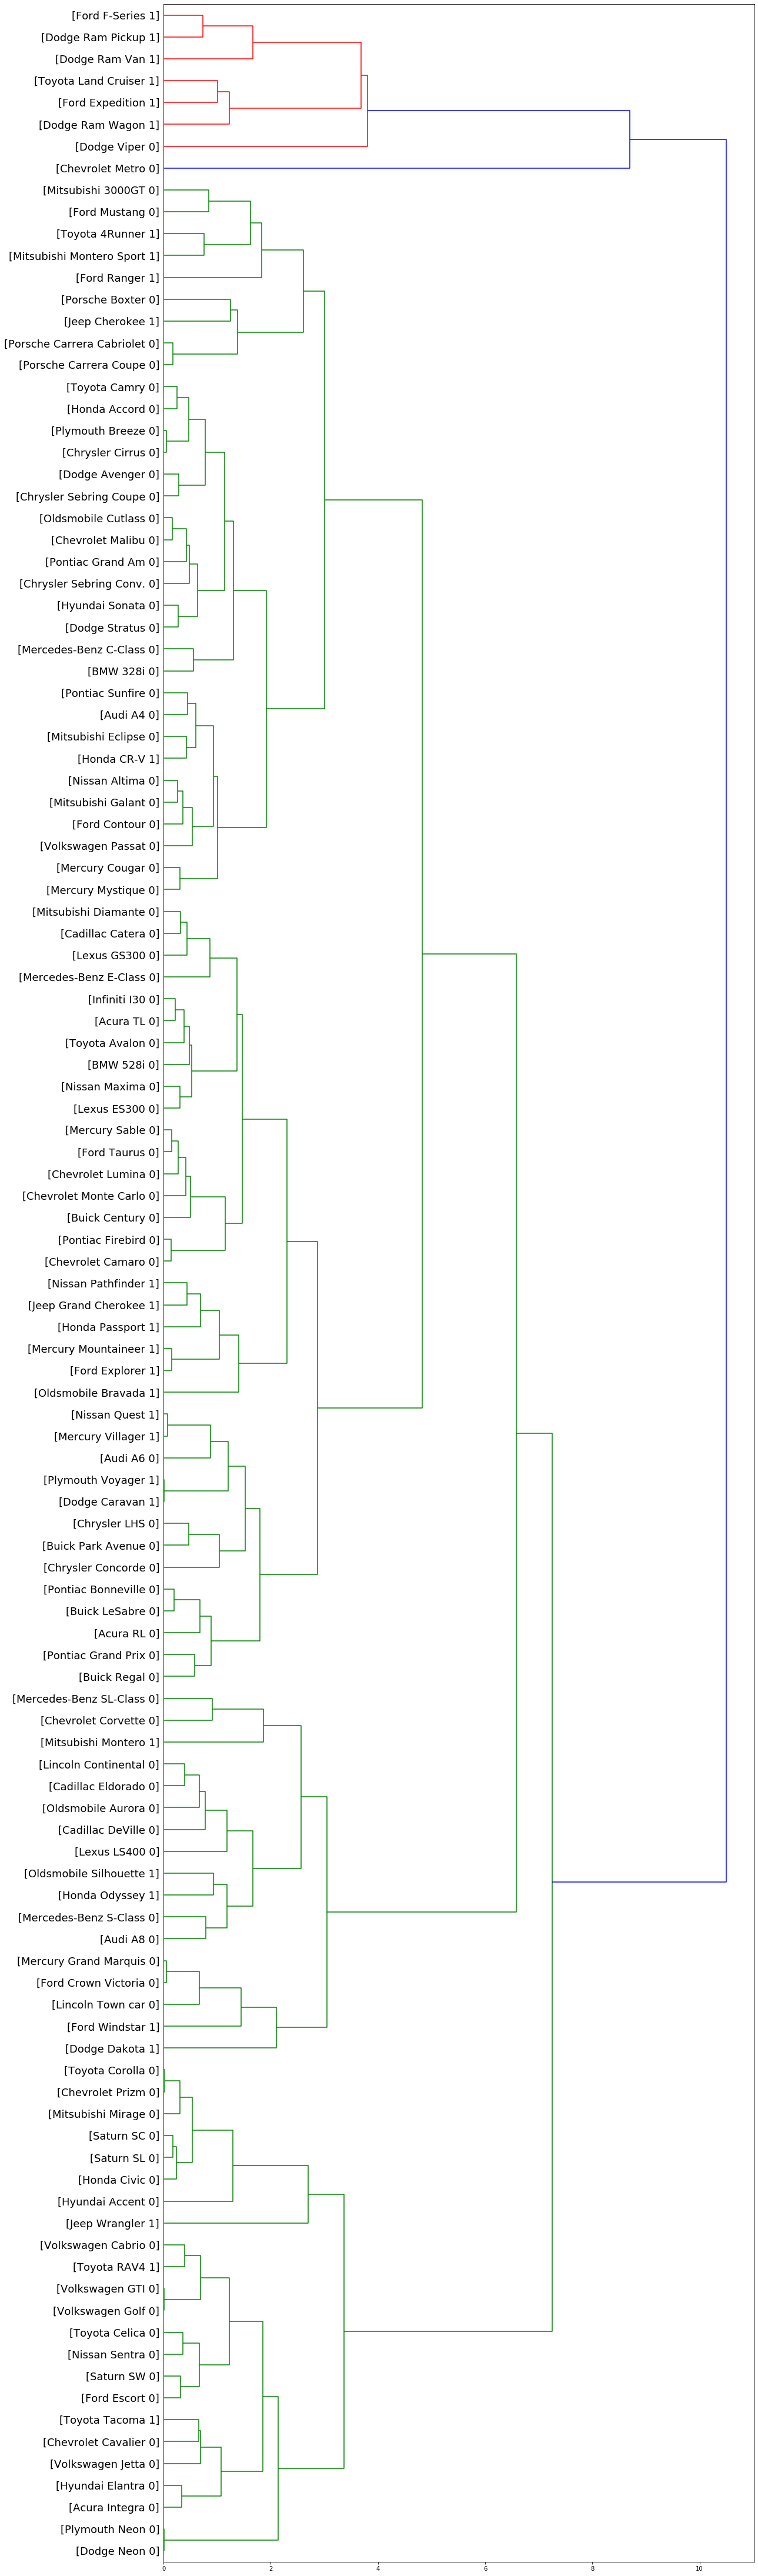

In [42]:
import pylab 
fig = pylab.figure(figsize=(18,80))
def llb(id):
    return '[%s %s %s]' %(df['manufact'][id],df['model'][id],int(float(df['type'][id])))
deng = hierarchy.dendrogram(Z,leaf_label_func=llb,leaf_rotation=0,leaf_font_size = 18,orientation='right')

## Clustering using scikit-learn
### Lets redo it again, but this time using scikit-learn package:

In [47]:
distance = distance_matrix(features,features)
distance

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [51]:
from sklearn.cluster import AgglomerativeClustering 
agglo = AgglomerativeClustering (n_clusters=6,linkage='complete')
agglo.fit(features)
labels = agglo.labels_

In [52]:
df['Cluster'] = agglo.labels_

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

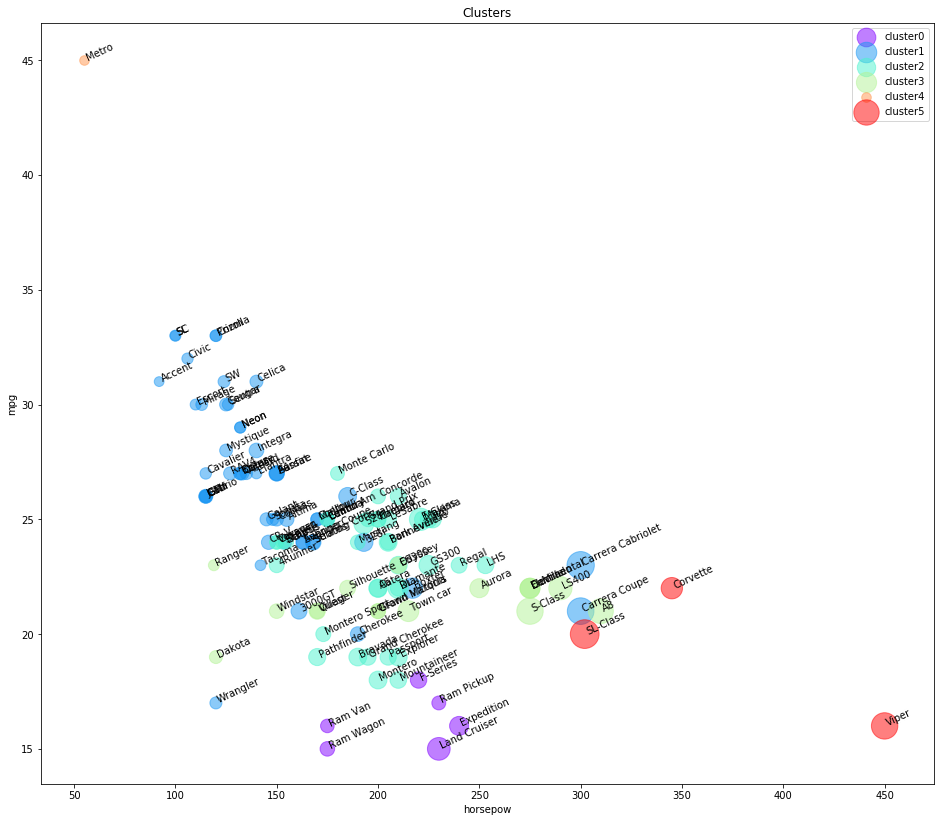

In [55]:
import matplotlib.cm as cm
n_clusters = max(agglo.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.Cluster == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

As you can see, we are seeing the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [59]:
agg_cars = df.groupby(['Cluster','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
Cluster type                                            
0       1.0   211.666667  4.483333  16.166667  29.024667
1       0.0   146.531915  2.246809  27.021277  20.306128
        1.0   145.000000  2.580000  22.200000  17.009200
2       0.0   203.111111  3.303704  24.214815  27.750593
        1.0   182.090909  3.345455  20.181818  26.265364
3       0.0   256.500000  4.410000  21.500000  42.870400
        1.0   160.571429  3.071429  21.428571  21.527714
4       0.0    55.000000  1.000000  45.000000   9.235000
5       0.0   365.666667  6.233333  19.333333  66.010000

### It is obvious that we have 3 main clusters with the majority of vehicles in those.

### Cars:

Cluster 1: with almost high mpg, and low in horsepower.<br>
Cluster 2: with good mpg and horsepower, but higher price than average<br>
Cluster 3: with low mpg, high horsepower, highest price.<br>
### Trucks:

Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.<br>
Cluster 2: with almost low mpg and medium horsepower, but higher price than average.<br>
Cluster 3: with good mpg and horsepower, low price.<br>
Please notice that we did not use type , and price of cars in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

## The centers of the clusters 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

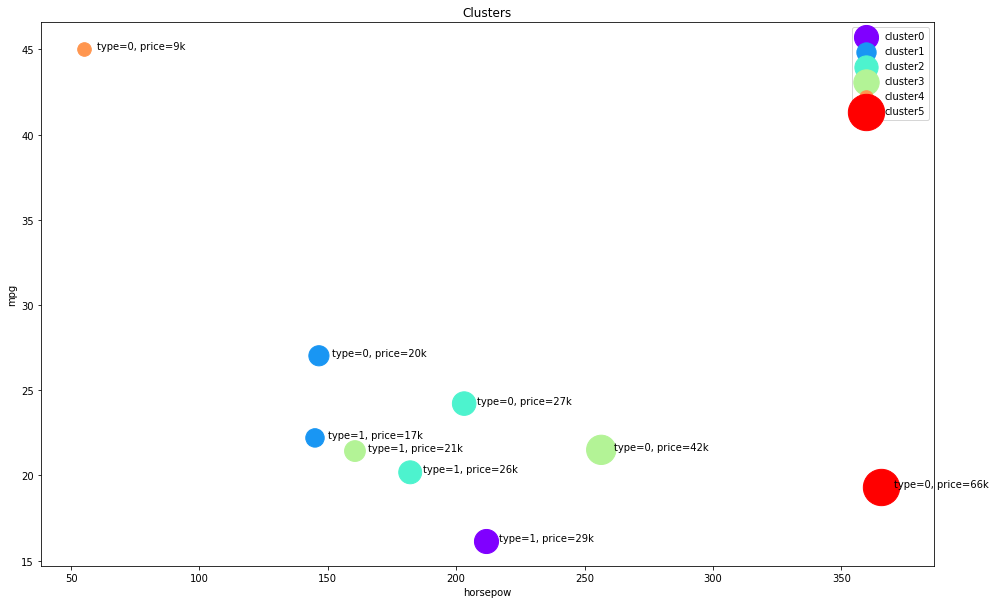

In [60]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
